# U.S. Medical Insurance Costs

## 0. Ideas for Analysis

#### Histograms 
- Number of entries
- Number of female/male, smoker/non-smoker, etc.
    - Write function to find unique values for each keyword
    - Write function to count how often values appear

- Averages, standard distribution

- Different regions (SW, NW, NE, ...)

Create class for Analysis with different methods!


#### Optional analysis
- Plot data

- Linear Regression on all parameters (find formula for the insurance, i.e. minimize least square error -->
implement exact solution)



In [3]:
import csv
import matplotlib.pyplot as plt

## 1. Inspect the CSV file

We take a look at the first few lines of the CSV file to see the information:



In [4]:
# print head of csv file
with open('insurance.csv') as insurance_csv:
    for i in range(5):
        print(insurance_csv.readline())

age,sex,bmi,children,smoker,region,charges

19,female,27.9,0,yes,southwest,16884.924

18,male,33.77,1,no,southeast,1725.5523

28,male,33,3,no,southeast,4449.462

33,male,22.705,0,no,northwest,21984.47061



The first row gives the keys for the other rows. We see that there is no running index for the data points. The separator is a comma (`,`).

### Parameters:
- `age`: Age in years (as `int`)
- `sex`: Sex (as `string` 'female'/'male')
- `bmi`: BMI (as `float`)
- `children`: Number of Children (as `int`)
- `smoker`: Smoker (as `string` 'yes'/'no')
- `region`: Region (as `string` 'southwest')
- `charges`: Insurance charges in dollars (as `float`)


## 2. Import libraries

In [5]:
import csv
import matplotlib.pyplot as plt
import random

## 3. Import file into Python as lists

We want to load the information for each column, i.e. each key, into its own list:

In [6]:
def load_data_list(lst,filename,key):
    
    with open(filename) as insurance_csv:
        reader = csv.DictReader(insurance_csv)
        for row in reader:
            lst.append(row[key])
    
    return lst

In [7]:
age_list = []
sex_list = []
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []

load_data_list(age_list,'insurance.csv','age')
load_data_list(sex_list,'insurance.csv','sex')
load_data_list(bmi_list,'insurance.csv','bmi')
load_data_list(children_list,'insurance.csv','children')
load_data_list(smoker_list,'insurance.csv','smoker')
load_data_list(region_list,'insurance.csv','region')
load_data_list(charges_list,'insurance.csv','charges')

print([bmi_list[i] for i in range(10)])

['27.9', '33.77', '33', '22.705', '28.88', '25.74', '33.44', '27.74', '29.83', '25.84']


# 4. Analyse Data

We want to create a class containing both the data from the lists as well as dedicated methods for analysis:

In [79]:
class PatientInfo:
    def __init__(self, ages, sexes, bmis, children, smokers, regions, charges):
        self.ages = [int(age) for age in ages]
        self.sexes = [int(sex == 'female') for sex in sexes] # transform sex into 0 for male, 1 for female
        self.bmis = [float(bmi) for bmi in bmis]
        self.children = [int(child) for child in children]
        self.smokers = [int(smoker == 'yes') for smoker in smokers] #transform 'smoker' into 1 and 'non-smoker' into 0
        self.regions = regions
        self.charges = [float(charge) for charge in charges]
        
        
    def category(self,string):
        if string == 'age':
            return self.ages
        if string == 'sex':
            return self.sexes
        if string == 'bmi':
            return self.bmis
        if string == 'children':
            return self.children
        if string == 'smoker':
            return self.smokers
        if string == 'region':
            return self.regions
        if string == 'charges':
            return self.charges
    
    def number(self):
        return len(self.ages)
    
    def average(self,string):
        total = 0
        current_list = self.category(string)
        for value in current_list:
            total += value
        return total / self.number()
        
    def nr_men_women(self):
        return self.sexes.count(0), self.sexes.count(1)    
    
    def print_men_women(self):
        men_nr, women_nr = self.nr_men_women()
        men_percent = men_nr / self.number() *100
        women_percent = women_nr / self.number() *100
        print("This dataset contains {} men ({:.2f} percent) and {} women ({:.2f} percent).".format(men_nr,men_percent,women_nr,women_percent))
    
    def nr_smoker_nonsmoker(self):
        return self.smokers.count(0), self.smokers.count(1)
    
    def print_smoker(self):
        smoker_nr, nonsmoker_nr = self.nr_smoker_nonsmoker()
        smoker_percent = smoker_nr / self.number() *100
        nonsmoker_percent = nonsmoker_nr / self.number() *100
        print("This dataset contains {} smokers ({:.2f} percent) and {} non-smokers ({:.2f} percent).".format(smoker_nr,smoker_percent,nonsmoker_nr,nonsmoker_percent))
    
    def unique_values(self,string):
        unique = []
        current_list = self.category(string)
        for element in current_list:
            if element not in unique:  # this guarantees uniqueness of values
                    unique.append(element)
        
        if type(unique[0]) == float or type(unique[0]) == int:
            sorted_unique = sorted(unique)
            return sorted_unique
        else:
            return unique
        
    def unique_value_count(self, string):
        current_list = self.category(string)
        unique_values = self.unique_values(string)
        value_count = [current_list.count(element) for element in unique_values]
        return list(zip(unique_values, value_count))
    
    def create_histogram(self, string):
        value_list =  self.unique_value_count(string)
        
        return plt.bar(*zip(*value_list))

Now we create an instance of this class and input the data from our lists:

In [80]:
patient_data = PatientInfo(age_list,sex_list,bmi_list,children_list,smoker_list,region_list,charges_list)


The individual data points can be accessed by calling the different attributes of the object:

In [17]:
print([patient_data.bmis[i] for i in range(10)])
print([patient_data.sexes[i] for i in range(10)])


[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1]


## 4.1 Number of Data Points

The method `number()` counts the number of datapoints, which will also be used in other methods calculating averages and percentages:

In [86]:
print(patient_data.number())

1338


## 4.2 Find Averages of Numerical Values

The `category` method is used to determine which attribute list to use, depending on the input string. This can be used for functions such as `average`, which enable the user to take the average of different categories.

Average age of the patients in the data set:

In [18]:
print(patient_data.average('age'))

39.20702541106129


Average insurance cost of patients in the data set:

In [88]:
print(patient_data.average('charges'))

13270.422265141257


Average number of children of patients in the data set:

In [89]:
print(patient_data.average('children'))

1.0949177877429


## 4.3 Find numbers for binary categories

We can use the `print_men_women` method to print out the numbers and percentages of men and women in the dataset:

In [63]:
patient_data.print_men_women()

This dataset contains 676 men (50.52 percent) and 662 women (49.48 percent).


Similarly, we can print out the numbers of smokers and non-smokers in the data with the `print_smoker` method:

In [66]:
patient_data.print_smoker()

This dataset contains 1064 smokers (79.52 percent) and 274 non-smokers (20.48 percent).


## 4.4 Find counts of unique values and plot histograms

For each keyword, the `unique_values` method returns a list of all unique values found in the corresponding list.  

In [67]:
patient_data.unique_values('region')

['southwest', 'southeast', 'northwest', 'northeast']

If the corresponding list has a numerical type of `float` or `int`, the list is also returned as a sorted list.

In [33]:
patient_data.unique_values('children')

[0, 1, 2, 3, 4, 5]

The `unique_value_count` method returns a list of unique values and their counts for a category:

In [69]:
patient_data.unique_value_count('region')

[('southwest', 325),
 ('southeast', 364),
 ('northwest', 325),
 ('northeast', 324)]

We can create histograms for each category by calling the `create_histogram` method. This plots the counts for the unique values as determined by the `unique_value_count` method.

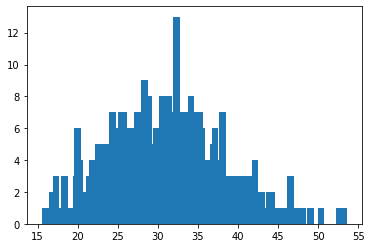

In [82]:
patient_data.create_histogram('bmi')
plt.show()